# TAREA 3
- José Castillo

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.matlib import repmat

## Parte 1

1- Utilice una imagen descargada de internet. De dicha imagen sólo utilice una sección de 512x512 
píxeles (su imagen original debe ser igual o mayor a dicho tamaño).

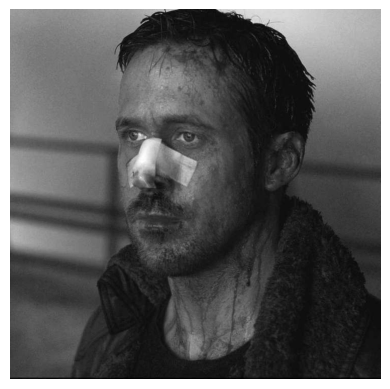

(733, 735)


In [14]:
img =cv2.imread('Ryan Gosling.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray"),plt.axis('off')
plt.show()
print(gray.shape)

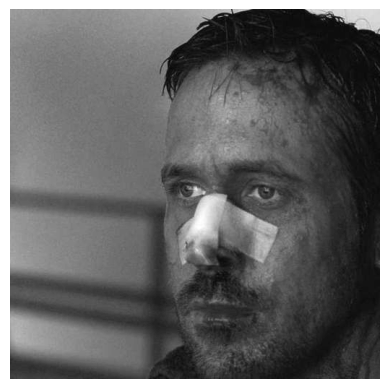

(512, 512)


In [15]:
gray_512= gray[:512, :512]
plt.imshow(gray_512,cmap="gray"),plt.axis('off')
plt.show()
print(gray_512.shape)

### Genere una imagen ruido frecuencial de 10Hz, una segunda imagen con 30Hz y una tercera imagen con 50Hz en forma vertical respectivamente (usted define la amplitud de la señal). 

In [31]:
def add_noise(imagen,A,F,ancho,largo):
    t = np.linspace(0,1,ancho)
    signal = A*np.sin(2*np.pi*F*t)
    S = repmat(signal,largo,1)
    gray_n = cv2.normalize(imagen.astype(float),None,0,1,cv2.NORM_MINMAX)
    gray_noise = cv2.add(S,gray_n)
    return gray_noise


(<Axes: title={'center': 'Ruido de 50 HZ'}>,
 Text(0.5, 1.0, 'Ruido de 50 HZ'),
 (-0.5, 511.5, 511.5, -0.5))

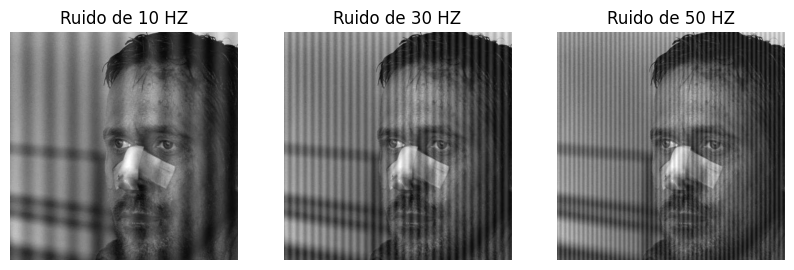

In [35]:
noise_10HZ = add_noise(gray_512,0.1,10,512,512)
noise_30HZ = add_noise(gray_512,0.1,30,512,512)
noise_50HZ = add_noise(gray_512,0.1,50,512,512)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1),plt.imshow(noise_10HZ,cmap="gray"),plt.title("Ruido de 10 HZ"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(noise_30HZ,cmap="gray"),plt.title("Ruido de 30 HZ"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(noise_50HZ,cmap="gray"),plt.title("Ruido de 50 HZ"),plt.axis('off')


### Genere una imagen que atenúe el ruido empleando filtros en la frecuencia para cada imagen del paso #2

Aplicamos la tranformada de f

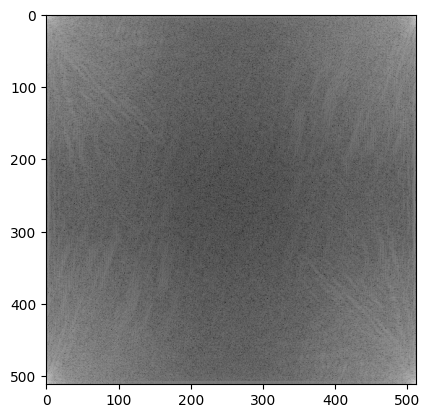

In [40]:
F= np.fft.fft2(noise_10HZ)
spectrum = np.log(np.abs(F))
fshift = np.fft.fftshift(F)
out = cv2.normalize(spectrum, None, 0.0, 1.0, cv2.NORM_MINMAX)
plt.imshow(out, cmap='gray')
plt.show()

